In [36]:
import my_mps
import d_dmrg
from bosehubbardfile import BoseHubbardModel
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#can ignore this cell
B = np.zeros([1, (5+1), 1], np.float)
B[0, 0, 0] = 1.
S = np.ones([1], np.float)
Bs = [B.copy() for i in range(5)]
Ss = [S.copy() for i in range(5)]
a = np.tensordot(np.diag(Ss[0]), Bs[0], [1, 0])
print(a)
b = np.tensordot(a, Bs[1], [2, 0])
print(b)

In [37]:
def my_expectation_value(psi, model):
    for i in range(model.L):
        ket = psi[i]
        bra = np.conj(psi[i])
        contraction = np.tensordot(ket, model.fixed_H_mpo[i], (1,2)) #vL [i] vR , hL hR [hup] hdown
        nextcontraction = np.tensordot(contraction, bra, axes=([4], [1])) #vL vR hL hR [hdown] , vL [i] vR
        #firstcontraction.append(nextcontraction)
        if i == 0: 
            energy = nextcontraction
        else: 
            #print("Energy", energy.shape)
            #print("Contraction", nextcontraction.shape)
            energy = np.tensordot(energy, nextcontraction, axes=([1,3,5],[0,2,4])) #vL [vR] hL [hR] vL [vR],  [vL] vR [hL] hR [vL] vR
            energy = np.transpose(energy, (0,3,2,4,1,5))
    return np.squeeze(energy)

In [38]:
import copy
def dmrg_gs(L, t, U, mu, nc, max_N_sweeps=10, chi_max=50, eps=1.e-10):
    model = BoseHubbardModel(L, t, U, mu, nc)
    psi = my_mps.init_spinup_MPS(L, nc)
    psi_initial = copy.deepcopy(psi.Bs)
    eng = d_dmrg.DMRGEngine(psi, model, chi_max=chi_max, eps=eps)
    Eprev = np.inf
    energyss = []
    for i in range(max_N_sweeps):
        print("sweep", i)
        eng.sweep()
        E = my_expectation_value(psi.Bs, model)
        #if abs((E - Eprev)) < eps: 
        #    print('')  # newline
        #    break
        #print(E)
        energyss.append(E)
        #Eprev = E
    print("max final bond dimension: ", max(psi.get_chi()))
    return model, psi, energyss

In [39]:
model, psi, energyss = dmrg_gs(20, 0.1, 1.0, 0.4, 4)

"""
output: 
sweep 0
-19.15059464878485
sweep 1
-18.833778306060637
sweep 2
-18.27964679111915
sweep 3
-19.26255199527073
sweep 4
-18.079261734634407
sweep 5
-18.91285883139576
sweep 6
-18.78532370620143
sweep 7
-16.684977307010563
sweep 8
-19.466464611656548
sweep 9
-14.95310423136435
max final bond dimension:  50
"""


sweep 0
-19.15059464878485
sweep 1
-18.833778306060637
sweep 2
-18.27964679111915
sweep 3
-19.26255199527073
sweep 4
-18.079261734634407
sweep 5
-18.91285883139576
sweep 6
-18.78532370620143
sweep 7
-16.684977307010563
sweep 8
-19.466464611656548
sweep 9
-14.95310423136435
max final bond dimension:  50


In [ ]:
#can ignore this cell 

# model, psi, energyss = dmrg_gs(3, 0.1, 1.0, 0.4, 4)
energyss = np.array(energyss)

#Es = []
for L in range(2, 20):
    model, psi, energyss = dmrg_gs(L, -0.5, 0, 0, 1)
    Es = my_expectation_value(psi.Bs, model)
    print(energyss[-1])
    print(Es)

#print(model.energy(psi))
"""
Es = np.array(Es)

plt.figure()
#print(energyss)
plt.plot(Es, marker='*')
plt.xlabel('step')
plt.ylabel('energies')
plt.show()
"""


In [40]:
mus = [0.0, 0.1, 0.2, 0.3, 0.4]#, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ts = [0.0, 0.05, 0.1, 0.15, 0.2, 0.21, 0.23, 0.25, 0.3, 0.35]
Us = [1.0] #0.3, 0.4, 0.5, 0.8, 1.0, 1.1, 1.2, 1.5, 2.0, 5.0

----------------------------------------
U = 1.0
mu = 0.0
t = 0.0
sweep 0
-0.749591906318875
sweep 1
0.6928230224277692
sweep 2
0.13784950639533355
sweep 3
-0.36378300059978264
sweep 4
0.060329171092327716
sweep 5
0.3532648486584016
sweep 6
0.07465455500041163
sweep 7
0.18354963472342756
sweep 8
-0.1864335923994711
sweep 9
0.06626663251953319
max final bond dimension:  25
U = 1.0
mu = 0.0
t = 0.05
sweep 0
-0.8622320283633662
sweep 1
-0.6409109376497543
sweep 2
-0.43446626260160337
sweep 3
-0.7965087453036457
sweep 4
-0.44391955788450543
sweep 5
0.21978137996532104
sweep 6
-0.03268000891990319
sweep 7
-0.614492956536085
sweep 8
-0.30832716974377805
sweep 9
-0.5313982234382542
max final bond dimension:  25
U = 1.0
mu = 0.0
t = 0.1
sweep 0
-0.5435848241603508
sweep 1
-0.13957920772308707
sweep 2
0.31769377618033673
sweep 3
-0.08772761964346376
sweep 4
0.03199801539674124
sweep 5
0.08481638933800006
sweep 6
-0.17318664631156822
sweep 7
-0.45431748152819806
sweep 8
0.16643656783940536
sweep

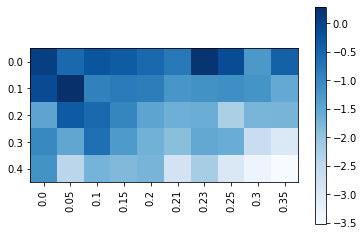

In [41]:

plt.figure()
Es = []
t_U = []
mu_U = []
for U in Us:
    for mu in mus:
        print('-'*40)
        for t in ts:
            print("U =", U)
            print("mu =", mu)
            print("t =", t)
            t_U.append(t/U)
            mu_U.append(mu/U)
            model, psi, energyss = dmrg_gs(5, t, U, mu, 4, chi_max=64, eps=1.e-10)
            Es.append(my_expectation_value(psi.Bs, model))
    Es = np.array(Es)
    t_U = np.array(t_U)
    mu_U = np.array(mu_U)
    print(t_U)
    print(mu_U)
    Es = np.reshape(Es, (len(mus), len(ts)))
    print("max chi = ", max(psi.get_chi()))
mu_U_lbl = np.unique(mu_U)
t_U_lbl = np.unique(t_U)
plt.xticks(ticks=np.arange(len(np.unique(t_U))),labels=t_U_lbl,rotation=90) #check x y
plt.yticks(ticks=np.arange(len(np.unique(mu_U))),labels=mu_U_lbl)
# save this plot inside a variable called hm
xmin = 0
xmax = 0.35
ymin = 0
ymax = 0.4
hm=plt.imshow(Es, cmap='Blues',interpolation="nearest") #, extent = (xmin,xmax,ymin,ymax)
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
plt.show()

In [ ]:
print(Es)
print(t_U)
print(mu_U)
print(len(np.unique(t_U)))
print(len(np.unique(mu_U)))
print(len(Es))

In [ ]:
plt.figure()
mu_U_lbl = np.unique(mu_U)
t_U_lbl = np.unique(t_U)
plt.xticks(ticks=np.arange(len(np.unique(t_U))),labels=t_U_lbl,rotation=90) #check x y
plt.yticks(ticks=np.arange(len(np.unique(mu_U))),labels=mu_U_lbl)
# save this plot inside a variable called hm
xmin = 0
xmax = 0.3
ymin = 0
ymax = 0.3
hm=plt.imshow(Es, cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
plt.show()

In [ ]:
#ignore this cell ! 


plt.figure()
for U in [1.0]:
    Es = []
    for mu in mus:
        print('-'*40)
        for t in ts:
            print("U =", U)
            print("mu =", mu)
            print("t =", t)
            model, psi, energyss = dmrg_gs(7, t, U, mu, 5, chi_max=64, eps=1.e-10)
            Es.append(model.energy(psi))
    Es = np.array(Es)
    Es = np.reshape(Es, (len(mus), len(ts)))
    print("max chi = ", max(psi.get_chi()))
plt.yticks(ticks=np.arange(len(mus)),labels=mus,rotation=90)
plt.xticks(ticks=np.arange(len(ts)),labels=ts)
# save this plot inside a variable called hm
hm=plt.imshow(Es, cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
plt.show()



plt.figure()
Es = []
for U in Us:
    for mu in [1.0]:
        print('-'*40)
        for t in ts:
            print("U =", U)
            print("mu =", mu)
            print("t =", t)
            model, psi = dmrg_gs(7, t, U, mu, 5, chi_max=64, eps=1.e-10)
            Es.append(model.energy(psi))
Es = np.array(Es)
Es = np.reshape(Es, (len(Us), len(ts)))
print("max chi = ", max(psi.get_chi()))
plt.yticks(ticks=np.arange(len(mus)),labels=mus,rotation=90)
plt.xticks(ticks=np.arange(len(ts)),labels=ts)
# save this plot inside a variable called hm
hm=plt.imshow(Es, cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
plt.show()



plt.figure()
for U in Us:
    Es = []
    for mu in mus:
        print('-'*40)
        for t in [1.0]:
            print("U =", U)
            print("mu =", mu)
            print("t =", t)
            model, psi = dmrg_gs(7, t, U, mu, 5, chi_max=64, eps=1.e-10)
            Es.append(model.energy(psi))
Es = np.array(Es)
Es = np.reshape(Es, (len(Us), len(mus)))
print("max chi = ", max(psi.get_chi()))
plt.yticks(ticks=np.arange(len(mus)),labels=mus,rotation=90)
plt.xticks(ticks=np.arange(len(ts)),labels=ts)
# save this plot inside a variable called hm
hm=plt.imshow(Es, cmap='Blues',interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
plt.show()


In [ ]:
#also can ignore

plt.figure()
U_ss = [0.0, 0.5, 1.0, 2.0]
Es = []
for U in U_ss:
    print("U =", U)
    model, psi = dmrg_gs(5, 1.5, U, 0.4, 5, chi_max=64, eps=1.e-10)
    Es.append(model.energy(psi))
Es = np.array(Es)
print(Es)
U_ss = np.array(U_ss)
print("max chi = ", max(psi.get_chi()))
plt.plot(U_ss, Es, marker='o')
#plt.xscale('log')
plt.xlabel('U')
plt.ylabel('energy')
plt.legend()
plt.show()

In [42]:
#Correlation function section 


# e)
def correlation_function(psi, X, Y, i):
    L = psi.L
    assert i < L
    corrs = []
    # first case: j = i
    # Note: psi.get_theta(i) = Lambda[i] B[i] with axes vL i vR
    theta = psi.get_theta1(i)  # vL i vR
    X_Y_theta = np.tensordot(np.dot(X, Y), # i [i*], [i] i*
                             theta, axes=([1], [1]))  # i [i*], vL [i] vR
    contr = np.tensordot(theta.conj(), X_Y_theta, axes=([0, 1, 2], [1, 0, 2]))  # [vL*] [i*] [vR*], [i] [vL] [vR]
    corrs.append(contr)
    # now for i < j
    theta = psi.get_theta1(i)  # vL i vR
    LP = np.tensordot(X, theta, axes=([1], [1]))  # i [i*], vL [i] vR
    LP = np.tensordot(theta.conj(), LP, axes=([0, 1], [1, 0])) # [vL*] [i*] vR*, [i] [vL] vR
    # now LP has axes vR*, vR
    for j in range(i+1, L):
        # contract with B Y B* to evaluate the correlation function for given j
        B = psi.Bs[j]  # vL j vR
        Y_B = np.tensordot(Y, B, axes=([1], [1])) # j [j*], vL [j] vR
        contr = np.tensordot(LP, Y_B, axes=([1], [1])) # vR* [vR], j [vL] vR
        contr = np.tensordot(contr, B.conj(), axes=([0, 1, 2], [0, 1, 2])) # [vR*] [j] [vR], [vL*] [j*] [vR*]
        corrs.append(contr.item())
        # get next LP for next i
        LP = np.tensordot(LP, B, axes=([1], [0])) # vR* [vR], [vL] j vR
        LP = np.tensordot(B.conj(), LP, axes=([0, 1], [0, 1])) # [vL*] [j*] vR*, [vR*] [j] vR
    return np.real_if_close(corrs)


# just to test it
model, psi, energyss = dmrg_gs(7, 0.1, 1.0, 0.4, 4, chi_max=64, eps=1.e-10)
cr = model.init_creation_op() 
ann = model.init_annihilation_op()
correlation_fn = correlation_function(psi, cr, ann, model.L//2)

print(correlation_fn)

sweep 0
-4.348284225071213
sweep 1
-3.779536552522018
sweep 2
-3.074671826251101
sweep 3
-2.8543327262622533
sweep 4
-4.60003900183401
sweep 5
-3.3791880081061185
sweep 6
-2.823590588950842
sweep 7
-2.813033970298432
sweep 8
-3.273976757372722
sweep 9
-3.3717368821782574
max final bond dimension:  64
[ 1.33722851 -1.28398986  1.15239452 -1.00608964]


In [43]:
num = model.init_number_op()
id = np.eye(model.d)
density = correlation_function(psi, num, id, model.L//2)

print(density)

[1.33722851 1.33722851 1.33722851 1.33722851]


In [44]:
plt.figure()
ncs = [0,1,2,3,4]
corrs = []
densities = []
t_U = []
mu_U = []
for U in Us:
    for mu in mus:
        print('-'*40)
        for t in ts:
            for nc in ncs:
                print("U =", U)
                print("mu =", mu)
                print("t =", t)
                print("nc =", nc)
                t_U.append(t/U)
                mu_U.append(mu/U)
                model, psi, energyss = dmrg_gs(5, t, U, mu, 4, chi_max=64, eps=1.e-10)
                corr = correlation_function(psi, cr, ann, model.L//4)
                print(corr)
                corrs.append(corr)
                density = correlation_function(psi, num, id, model.L//2)
                print(density)
                densities.append(density)
    t_U = np.array(t_U)
    mu_U = np.array(mu_U)
    ncs = np.array(ncs)
    print(t_U)
    print(mu_U)
    print(ncs)
    corrs = np.reshape(corrs, (len(np.unique(mu_U)),len(np.unique(t_U)),len(np.unique(ncs)),4))#why 4 -> no sites?
    densities = np.reshape(densities, (len(np.unique(mu_U)),len(np.unique(t_U)),len(np.unique(ncs)),3)) #why 3?
    print("max chi = ", max(psi.get_chi()))
plt.xticks(ticks=np.arange(len(t_U)),labels=t_U,rotation=90)
plt.yticks(ticks=np.arange(len(mu_U)),labels=mu_U)
# save this plot inside a variable called hm
hm=plt.imshow(corrs, cmap='Blues',interpolation="nearest")
hm2=plt.imshow(densities, cmap='Blues',interpolation="nearest")

# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
plt.colorbar(hm2)
plt.show()

----------------------------------------
U = 1.0
mu = 0.0
t = 0.0
sweep 0
-0.5843267362796105
sweep 1
0.5058343228302922
sweep 2
0.2558770098912393
sweep 3
-0.3855893666266894
sweep 4
0.5427910989198794
sweep 5
-0.329867677000381
sweep 6
-0.7526436981322208
sweep 7
0.24326874508003793
sweep 8
-0.20033723327724728
sweep 9
-0.6069187383027638
max final bond dimension:  25
[ 0.15991808 -0.30007569  0.27591856 -0.23373157]
[0.69969726 0.69969726 0.69969726]
U = 1.0
mu = 0.0
t = 0.0
sweep 0
0.3773879794689685
sweep 1
-0.2501105373748771
sweep 2
-0.27928100998163763
sweep 3
0.06021656764668443
sweep 4
0.3612964490691215
sweep 5
0.5520389776878595
sweep 6
0.05459859014666835
sweep 7
-0.2830674602019798
sweep 8
-0.6559766190512368
sweep 9
-0.15382811861889978
max final bond dimension:  25
[ 0.07275687 -0.15648861  0.17977998 -0.19008177]
[0.45110381 0.45110381 0.45110381]
U = 1.0
mu = 0.0
t = 0.0
sweep 0
-0.9967247615581294
sweep 1
-0.48813705109675043
sweep 2
0.010320187601389752
sweep 3
-0.1

ValueError: cannot reshape array of size 1000 into shape (35,10)

<Figure size 432x288 with 0 Axes>

max chi =  25


TypeError: Invalid shape (5, 10, 5, 4) for image data

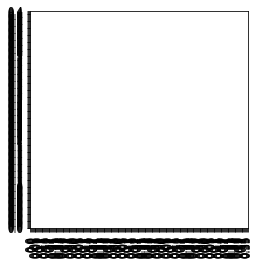

In [59]:
plt.figure()
corrs = np.reshape(corrs, (len(np.unique(mu_U)),len(np.unique(t_U)),len(np.unique(ncs)),4))#why 4 -> no sites?
densities = np.reshape(densities, (len(np.unique(mu_U)),len(np.unique(t_U)),len(np.unique(ncs)),3)) #why 3?
print("max chi = ", max(psi.get_chi()))
plt.xticks(ticks=np.arange(len(t_U)),labels=t_U,rotation=90)
plt.yticks(ticks=np.arange(len(mu_U)),labels=mu_U)
# save this plot inside a variable called hm
hm=plt.imshow(corrs, cmap='Blues',interpolation="nearest")
hm2=plt.imshow(densities, cmap='Blues',interpolation="nearest")

# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
plt.colorbar(hm2)
plt.show()

In [ ]:
corrs = np.reshape(corrs, (7*len(mus), len(ts)))
densities = np.reshape(densities, (5*len(mus), len(ts)))
print("max chi = ", max(psi.get_chi()))
plt.yticks(ticks=np.arange(len(t_U)),labels=t_U,rotation=90)
plt.xticks(ticks=np.arange(len(mu_U)),labels=mu_U)
# save this plot inside a variable called hm
hm=plt.imshow(corrs, cmap='Blues',interpolation="nearest")
hm2=plt.imshow(densities, cmap='Blues',interpolation="nearest")

# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
plt.colorbar(hm2)
plt.show()

In [ ]:
plt.figure()
plt.plot(corrs[0], np.unique(mu_U), marker='o')
#plt.xscale('log')
plt.xlabel('U')
plt.ylabel('energy')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(corrs[1], np.unique(t_U), marker='o')
#plt.xscale('log')
plt.xlabel('U')
plt.ylabel('energy')
plt.legend()
plt.show()